## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as ma
from sklearn.metrics import r2_score
%matplotlib inline 

#### Plotting functions

In [206]:
def Loss_Epochs_plot(X, Y, xlabel, ylabel):
    fig = plt.figure(figsize = (10, 5))
    plt.plot(X, Y, marker = 'o')
    plt.grid(linewidth = 0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Vs. {xlabel}")
    
def regression_lines_plot(X, Y, xlabel, ylabel):
    plt.plot(X, Y, 'r')
    plt.grid(linewidth = 0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Vs. {xlabel}")
    
def training_report(a , b, c, d, e, f, g):
    print("\n****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {int(a)} epochs")
    print(f"\ntheta_0_Opt : {b}\ntheta__Opt : {c}")
    print("\nError Vector:\n", d)
    print("\nCost = ", e)
    print("\nh(x) = y_predict:\n", f)
    print("\ny_actual:\n", g)
    
def training_report_S_M_GD(a, b, c):
    print("\n****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {int(a[-1][0] + 1)} epochs")
    print(f"\ntheta_0_Opt : {b[0]}\ntheta__Opt : {b[1]}")
    print("\nCost = ", c[-1][4])

    
def all_plots(m, X, Y, Y_pred, LR):
    theta_0 = m[:, 1]
    theta_1 = m[:, 2]

    cost = m[:, 3]
    x = m[:, 0]
    fig = plt.figure()
    Loss_Epochs_plot(x, cost, 'Ephocs', 'Loss')

    Loss_Epochs_plot(theta_0, cost, 'theta_0', "Loss")
    plt.title(f"Learning Rate = {LR}")
    Loss_Epochs_plot(theta_1, cost, "theta_1", "Loss")
    plt.title(f"Learning Rate = {LR}")

    fig = plt.figure(figsize=(10, 5))
    plt.plot(X, Y, 'ob')
    for i in Y_pred:
        regression_lines_plot(X, i, "x", "y")
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(X, Y, 'ob', markersize = 4)
    regression_lines_plot(X, Y_pred[-1], "x", "y")
    
def all_plots_S_M_GD(a, X, Y, Y_pred, LR):
    cost = a[:, 4]
    x = np.arange(len(a[:, 1]))
    fig = plt.figure(figsize = (10, 5))
    Loss_Epochs_plot(x, cost, 'iteration' , 'Loss')

    theta_0 = a[:, 2]
    theta_1 = a[:, 3]
    
    Loss_Epochs_plot(theta_0, cost, 'theta_0', "Loss")
    plt.title(f"Learning Rate = {LR}")
    Loss_Epochs_plot(theta_1, cost, "theta_1", "Loss")
    plt.title(f"Learning Rate = {LR}")

    fig = plt.figure(figsize=(10, 5))
    plt.plot(X, Y, 'ob', markersize = 4)
    regression_lines_plot(X, Y_pred, "x", "y")

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [207]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [208]:
X.shape
m = len(X)

In [209]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

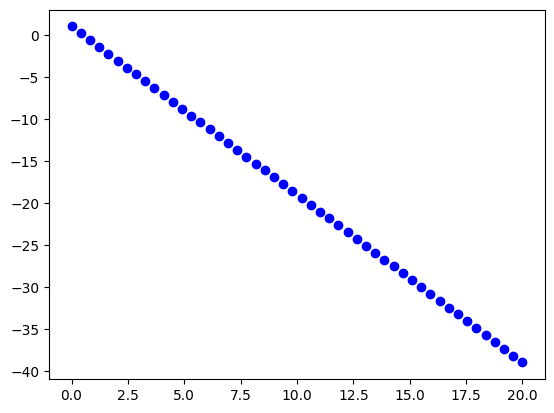

In [210]:
plt.plot(X, y, 'ob')

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [211]:
def GD_single_var(X, Y, LR, Max_iter):
    # step_1
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    Y_pred = []
    Thetas_Cost = []
        
    for i in range(Max_iter):
        print(f"\n****************** Training {i} ********************")
    # step_2:
        y_pred = theta_0 + (theta_1*X)
        print("\nh(x):\n", y_pred)
        Y_pred.append(y_pred)
        
    # step_3
        Error = y_pred - Y
        cost = (1/(2*m)) * (Error @ Error)   
        print("\nError Vector:\n", Error)
        print("\nj: ", cost)
        
        Thetas_Cost.append([i, theta_0, theta_1, cost])         # append values of thetas and cost 
    
    # step_4
        d_theta_0 = (1/m) * sum(Error * 1)
        d_theta_1 = (1/m) * sum(Error * X)
        GV = [[d_theta_0], 
             [d_theta_1]]
        GV_norm = np.linalg.norm(GV)
        print("\nGradient Vector:\n", GV)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.001) or ((i > 0) and (abs(Thetas_Cost[i][3] - Thetas_Cost[i-1][3])) < 0.001):       # (Gradient Check, convergence check)
            break
    
    # step_5
        theta_0 = theta_0 - (LR * d_theta_0)
        theta_1 = theta_1 - (LR * d_theta_1)
        print("\ntheta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
    
    return np.array(Thetas_Cost), Error, np.array(Y_pred), [theta_0, theta_1]
    

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [212]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = GD_single_var(X, y, 0.0005, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j:  249.88775510204087

Gradient Vector:
 [[19.0], [259.3877551020408]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new:  -0.0095
theta_1_new:  -0.129693

#### Calculate r2 score

In [213]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

<Figure size 1000x500 with 0 Axes>

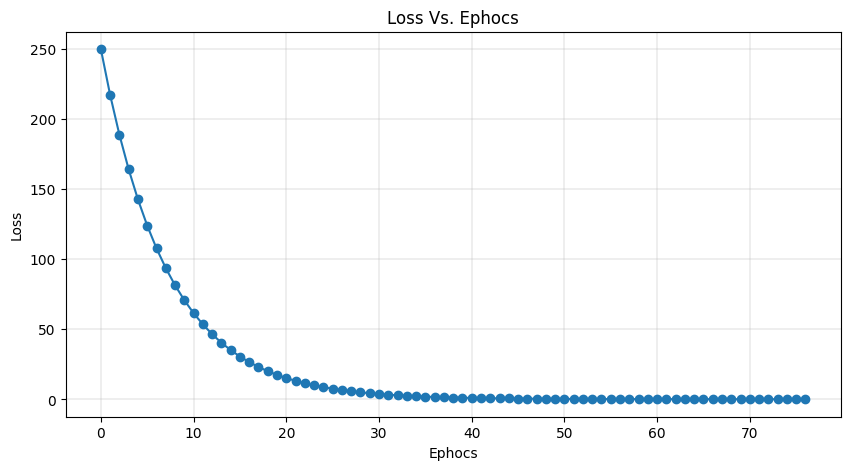

In [214]:
cost = theta_cost_vec[:, 3]
x = theta_cost_vec[:, 0]
fig = plt.figure(figsize = (10, 5))
Loss_Epochs_plot(x, cost, 'Ephocs', 'Loss')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [215]:
theta_0 = theta_cost_vec[:, 1]
theta_1 = theta_cost_vec[:, 2]

Text(0.5, 1.0, 'Learning Rate = 0.0005')

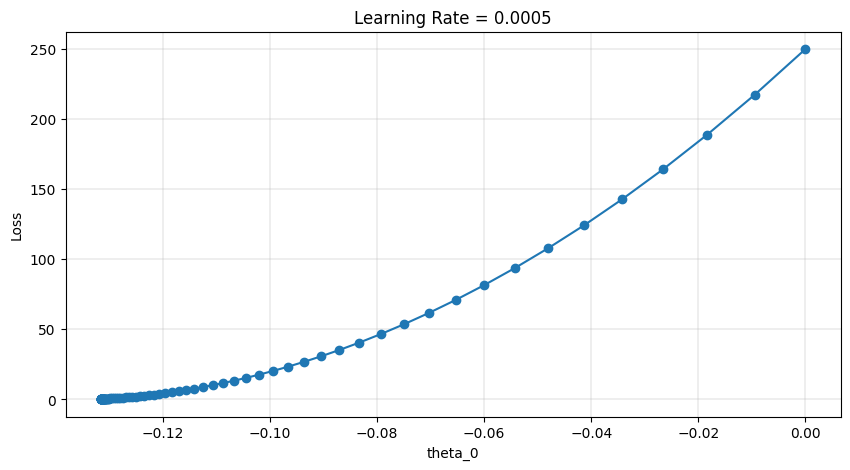

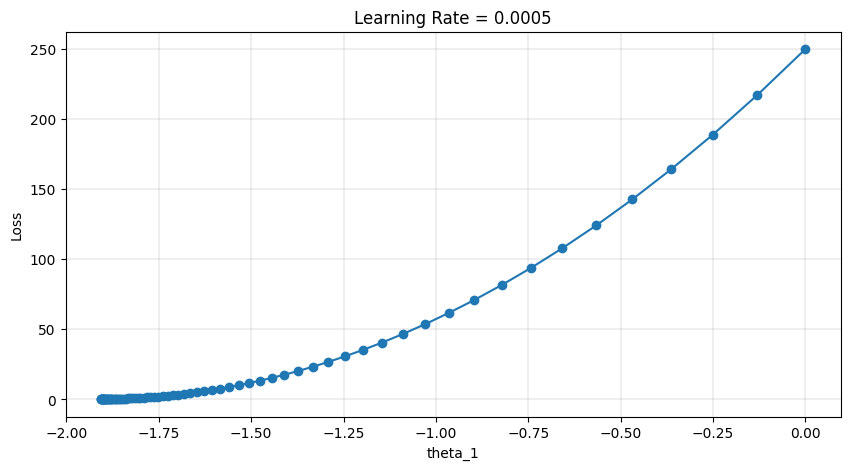

In [216]:
Loss_Epochs_plot(theta_0, cost, 'theta_0', "Loss")
plt.title("Learning Rate = 0.0005")
Loss_Epochs_plot(theta_1, cost, "theta_1", "Loss")
plt.title("Learning Rate = 0.0005")

#### Plot all regression lines till converge

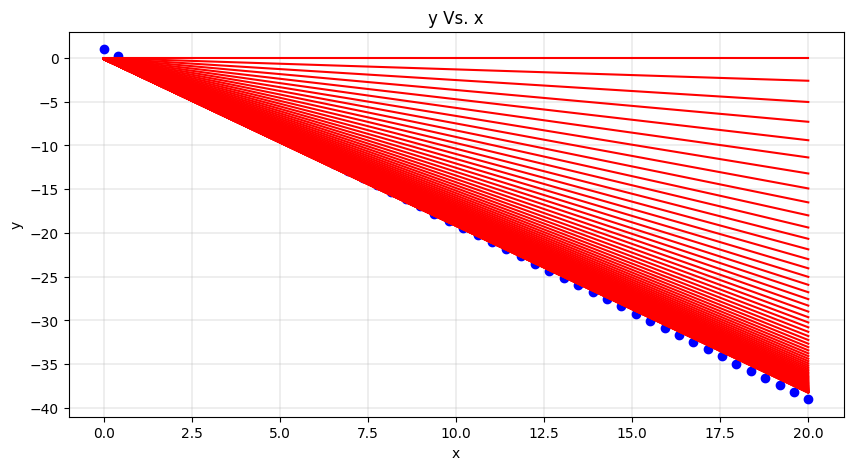

In [217]:
fig = plt.figure(figsize = (10, 5))
plt.plot(X, y, 'ob')
for i in y_pred_GD:
	regression_lines_plot(X, i, "x", "y")

#### Plot the best regression line

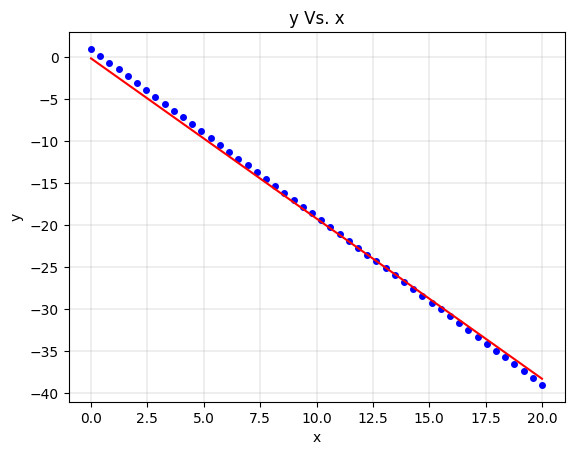

In [218]:
plt.plot(X, y, 'ob', markersize = 4)
regression_lines_plot(X, y_pred_GD[-1], "x", "y")

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [219]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = GD_single_var(X, y, 0.00005, 1000)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j:  249.88775510204087

Gradient Vector:
 [[19.0], [259.3877551020408]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new:  -0.00095
theta_1_new:  -0.01296


****************** Training Report ********************

Gradient Descent converged after 601 epochs

theta_0_Opt : -0.13128497509265505
theta__Opt : -1.8831939332549636

Error Vector:
 [-1.13128498 -1.08360903 -1.03593308 -0.98825714 -0.94058119 -0.89290525
 -0.8452293  -0.79755336 -0.74987741 -0.70220146 -0.65452552 -0.60684957
 -0.55917363 -0.51149768 -0.46382174 -0.41614579 -0.36846985 -0.3207939
 -0.27311795 -0.22544201 -0.17776606 -0.13009012 -0.08241417 -0.03473823
  0.01293772  0.06061367  0.10828961  0.15596556  0.2036415   0.25131745
  0.29899339  0.34666934  0.39434528  0.44202123  0.48969718  0.53737312
  0.58504907  0.63272501  0.68040096  0.7280769   0.77575285  0.82342879
  0.87110474  0.91878069  0.96645663  1.01413258  1.06180852  1.10948447
  1.15716041  1.20483636]

Cost =  0.23735191239009265

h(x) = y_predict:
 [ -0.13128498  -0.89993556  -1.66858615  -2.43723673  -3.20588732
  -3.9745379   -4.74318849  -5.51183907  -6.28048966  -7.04914024
  -7.81779083  -8.58644

In [220]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9965793400861428


<Figure size 640x480 with 0 Axes>

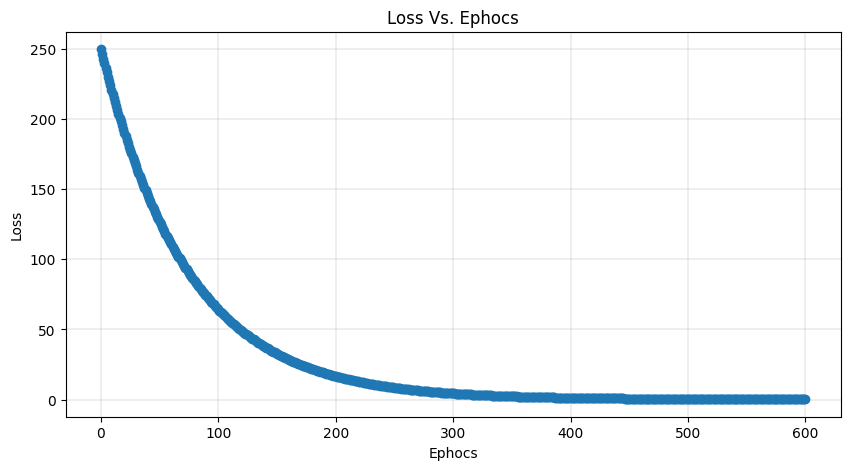

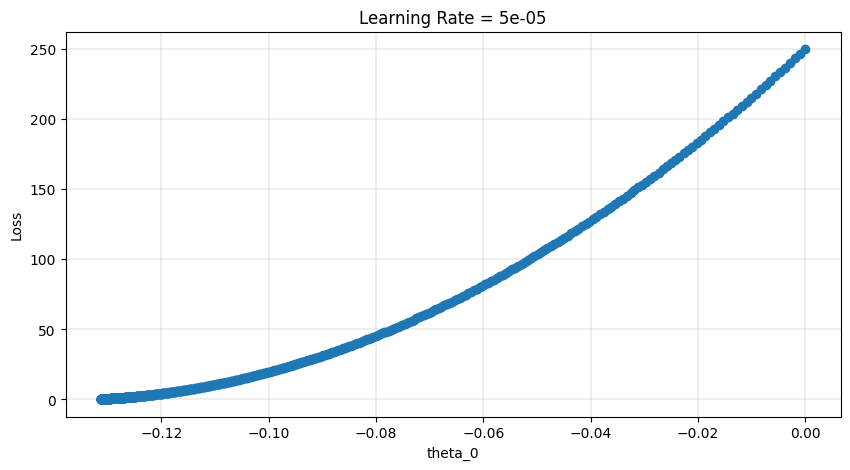

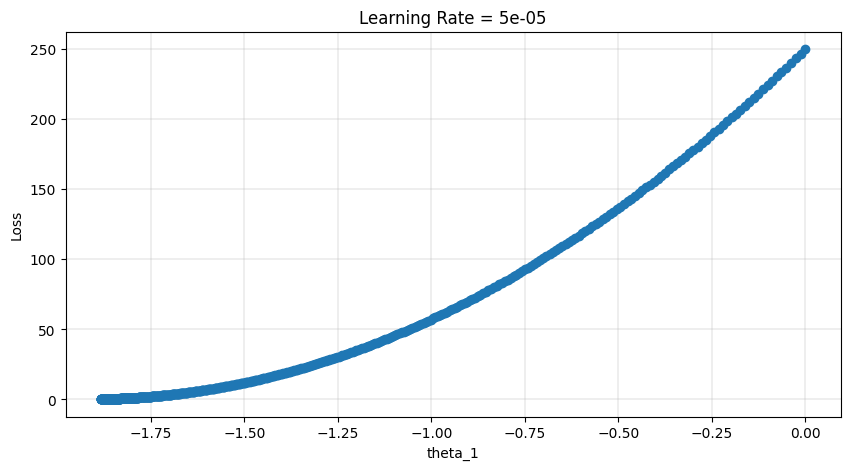

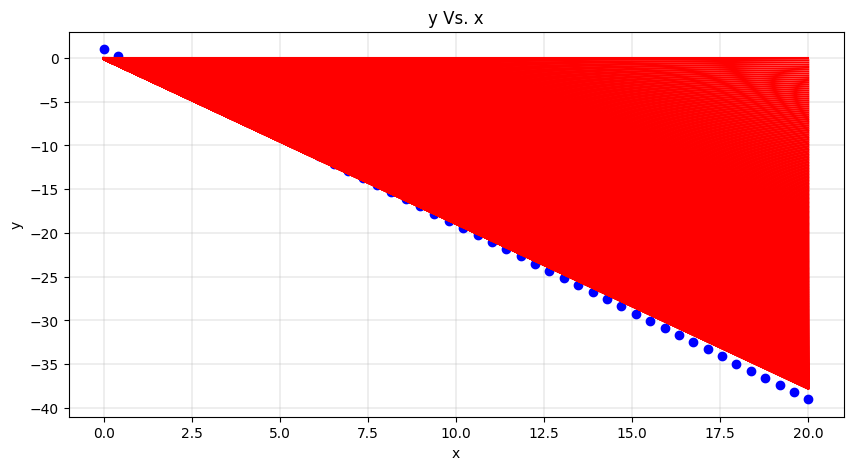

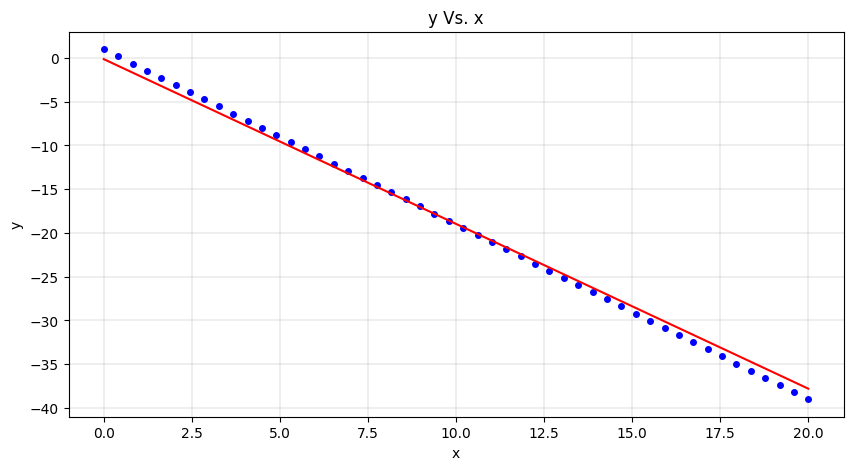

In [221]:
all_plots(theta_cost_vec, X, y, y_pred_GD, 0.00005)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [222]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = GD_single_var(X, y, 0.005, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j:  249.88775510204087

Gradient Vector:
 [[19.0], [259.3877551020408]]

Gradient Vector Norm:
 260.0826935743251

theta_0_new:  -0.095
theta_1_new:  -1.2969387

In [223]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9976200723230484


<Figure size 640x480 with 0 Axes>

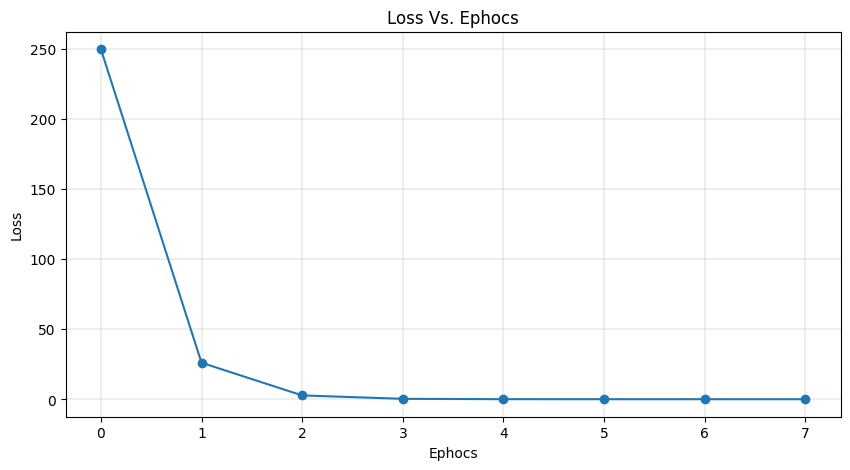

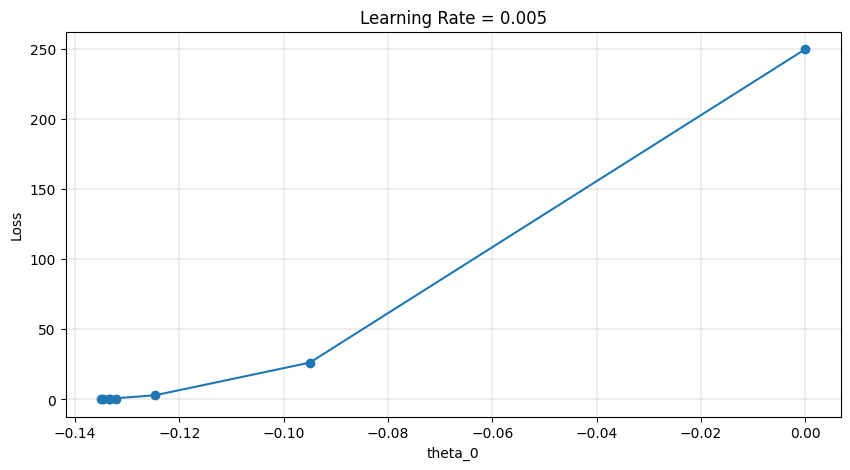

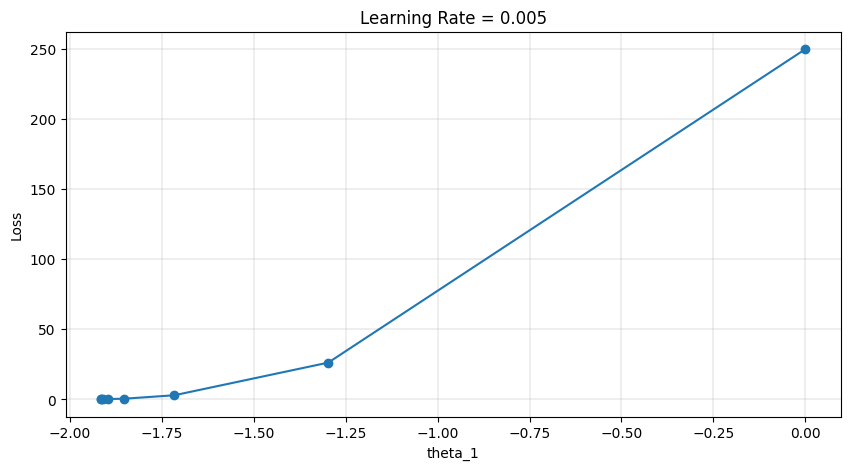

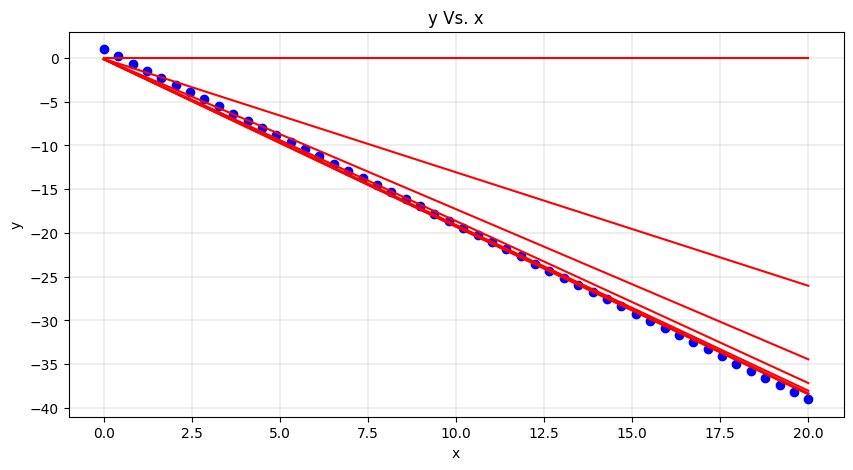

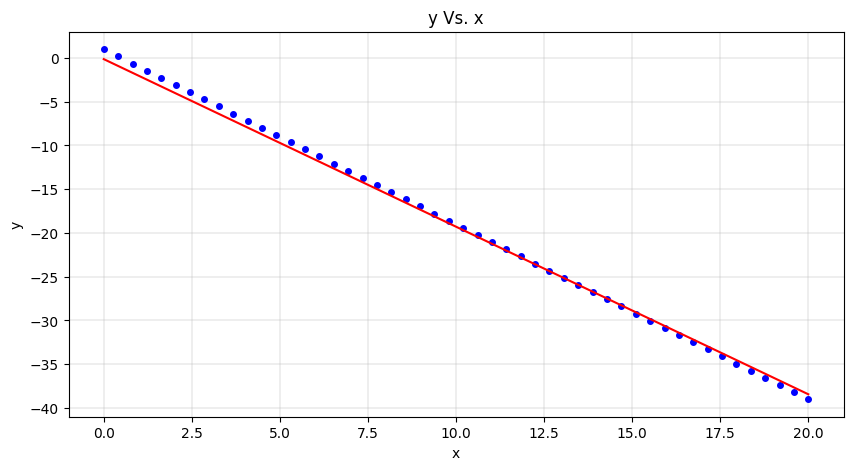

In [224]:
all_plots(theta_cost_vec, X, y, y_pred_GD, 0.005)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


#### shuffle the data.

In [225]:
import random

X = np.linspace(0,20)

a=-2
b=1
y=a*X+b

data = [(i,j) for i,j in zip(X,y)]        # list(zip(X,y))

np.array(random.shuffle(data))
shuf_data = np.array(data)

X_shuff = shuf_data[:, [0]].reshape(50)
y_shuff = shuf_data[:, [1]].reshape(50)

#### SGD implementation

In [226]:
def SGD_single_var(X, Y, LR, Max_iter):
    # step_1
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    Y_pred = []
    Thetas_Cost = []

    epoch_cost = []
    for i in range(Max_iter):
        print(f"\n****************** Ephoc {i} ********************")
        for j in range(m):
    # step_2:
            y_pred = theta_0 + (theta_1*X[j])
            Y_pred.append([X[j], y_pred])
    # step_3
            error = y_pred - Y[j]
            cost = (1/(2)) * ((error)**2)
        
            Thetas_Cost.append([i, j, theta_0, theta_1, cost])         # append values of thetas and costs
    # step_4
            d_theta_0 = error * 1
            d_theta_1 = error * X[j]
    # step_5
            theta_0 = theta_0 - (LR * d_theta_0)
            theta_1 = theta_1 - (LR * d_theta_1)
            
        print("\nCost = ", cost)
        epoch_cost.append(cost)
        
        GV = [[d_theta_0], 
              [d_theta_1]]
        GV_norm = np.linalg.norm(GV)
        print("\nGradient Vector:\n", GV)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.001) or ((i > 0) and (abs(epoch_cost[i] - epoch_cost[i-1]) < 0.001)):   # (Gradient Check, convergence check)
            break
        
        print("\ntheta_0_new : ", theta_0)
        print("theta_1_new : ", theta_1)
    return np.array(Thetas_Cost), Y_pred, [theta_0, theta_1]
    

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [227]:
theta_cost_vec, y_pred_GD, thetas_opt = SGD_single_var(X_shuff, y_shuff, 0.0005, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  0.4208886385975022

Gradient Vector:
 [[0.9174842108695955], [13.481400649512425]]

Gradient Vector Norm:
 13.512584532570704

theta_0_new :  -0.14452034833629096
theta_1_new :  -1.866441054438753

****************** Ephoc 1 ********************

Cost =  0.0037158162765386035

Gradient Vector:
 [[0.08620691708370742], [1.2667138836789662]]

Gradient Vector Norm:
 1.2696439247513953

theta_0_new :  -0.14126139100912827
theta_1_new :  -1.9171002527375611

****************** Ephoc 2 ********************

Cost =  0.002014734687533952

Gradient Vector:
 [[0.06347810153956956], [0.9327394511936753]]

Gradient Vector Norm:
 0.9348969746384606

theta_0_new :  -0.13407741327774095
theta_1_new :  -1.9189682238748185

****************** Ephoc 3 ********************

Cost =  0.0019516606618114063

Gradient Vector:
 [[0.06247656619583708], [0.9180230134898509]]

Gradient Vector Norm:
 0.9201464962823093

****************** Training Report **

In [228]:
data_shuf = np.array(y_pred_GD[-m:])
y_pred_shuf = data_shuf[:, [1]].reshape(50)

data_shuf_sorted = np.sort(data_shuf, axis = 0)
y_pred_unshuf = data_shuf_sorted[:, [1]].reshape(50)[::-1]

In [229]:
score = r2_score(y_shuff,y_pred_shuf)
print("r2_score: ", score)

r2_score:  0.9975948564397039


<Figure size 1000x500 with 0 Axes>

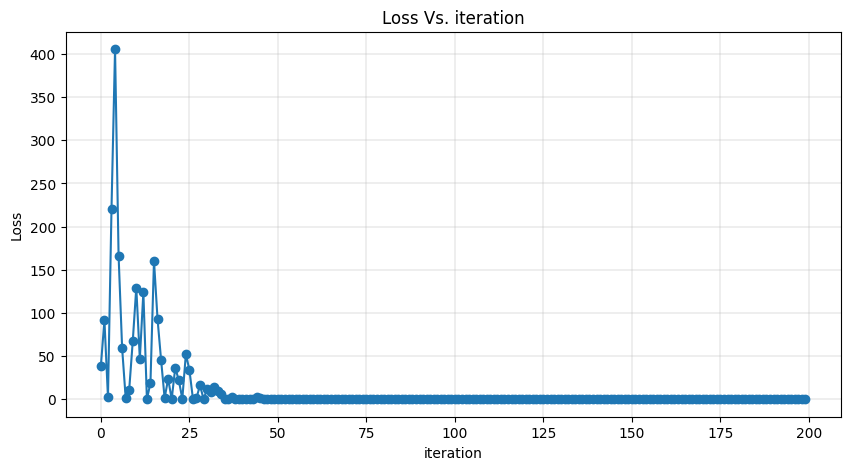

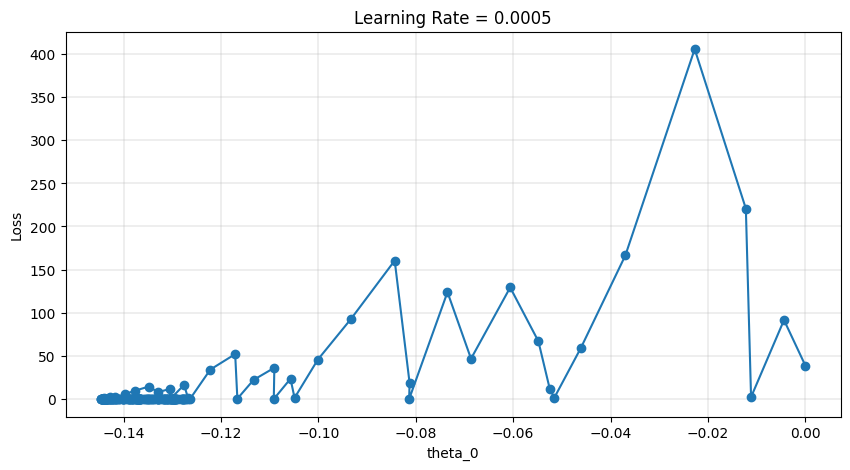

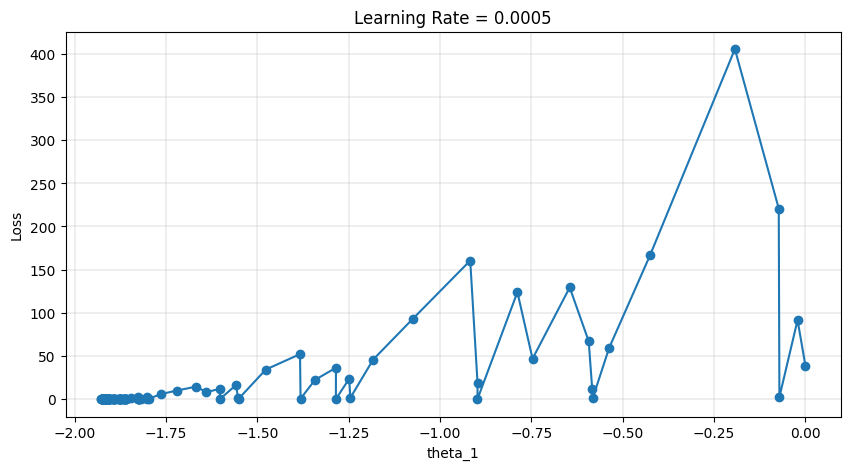

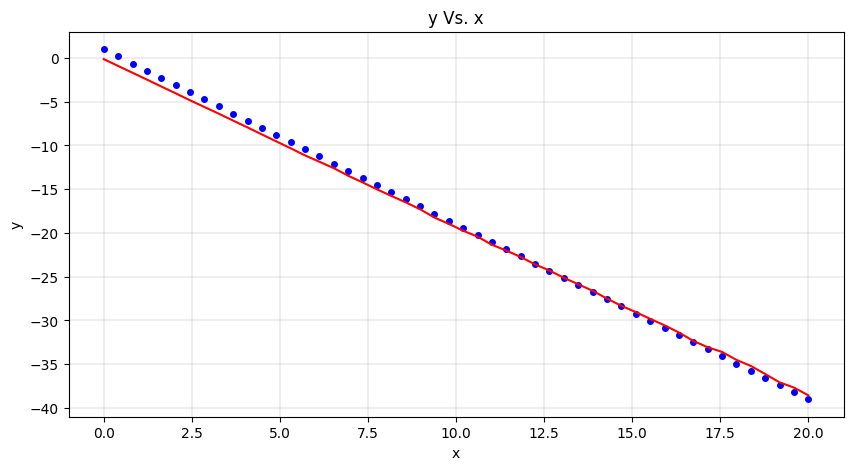

In [230]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.0005)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [231]:
theta_cost_vec, y_pred_GD, thetas_opt= SGD_single_var(X_shuff, y_shuff, 0.0001, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  107.4814029614137

Gradient Vector:
 [[14.66160993625282], [215.43590110412308]]

Gradient Vector Norm:
 215.93422676932974

theta_0_new :  -0.07031565737046662
theta_1_new :  -0.9509984342786715

****************** Ephoc 1 ********************

Cost =  27.60145628338953

Gradient Vector:
 [[7.429866254972499], [109.17354497102447]]

Gradient Vector Norm:
 109.42607474504

theta_0_new :  -0.10501080095671425
theta_1_new :  -1.4301221192250442

****************** Ephoc 2 ********************

Cost =  7.16985476491755

Gradient Vector:
 [[3.786780892768302], [55.64249475088118]]

Gradient Vector Norm:
 55.7712016333849

theta_0_new :  -0.1217628555625693
theta_1_new :  -1.671536348861424

****************** Ephoc 3 ********************

Cost =  1.9041782864368761

Gradient Vector:
 [[1.9515011075768705], [28.67511831541524]]

Gradient Vector Norm:
 28.74144684903556

theta_0_new :  -0.12947691572062517
theta_1_new :  -1.7932031218

In [232]:
data_shuf = np.array(y_pred_GD[-m:])
y_pred_shuf = data_shuf[:, [1]].reshape(50)

data_shuf_sorted = np.sort(data_shuf, axis = 0)
y_pred_unshuf = data_shuf_sorted[:, [1]].reshape(50)[::-1]

In [233]:
score = r2_score(y_shuff,y_pred_shuf)
print("r2_score: ", score)

r2_score:  0.9976288813130448


<Figure size 1000x500 with 0 Axes>

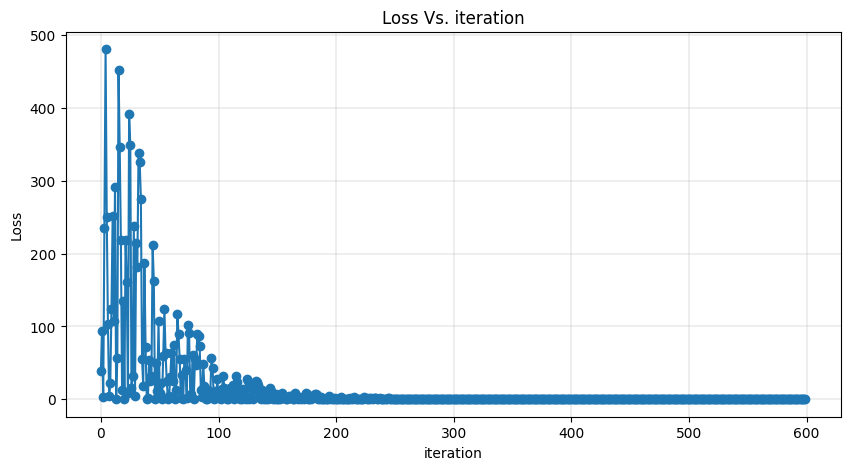

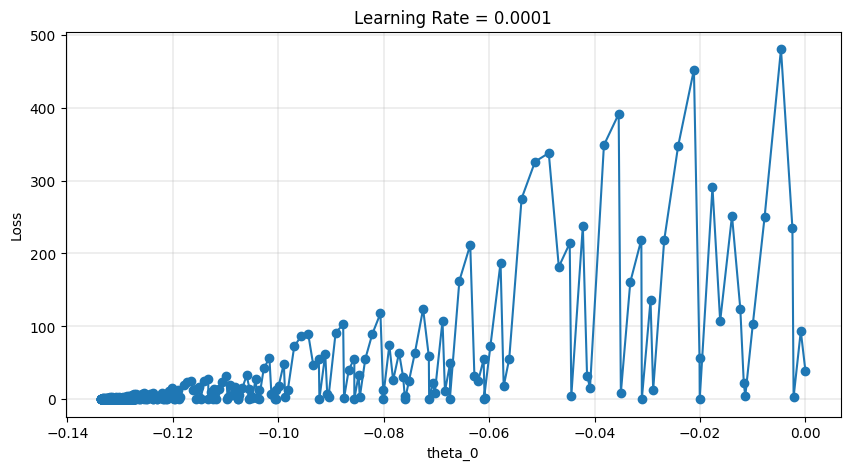

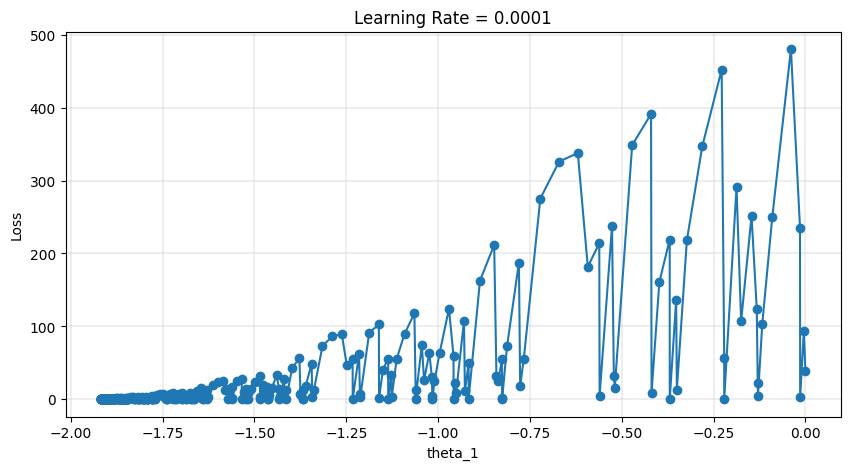

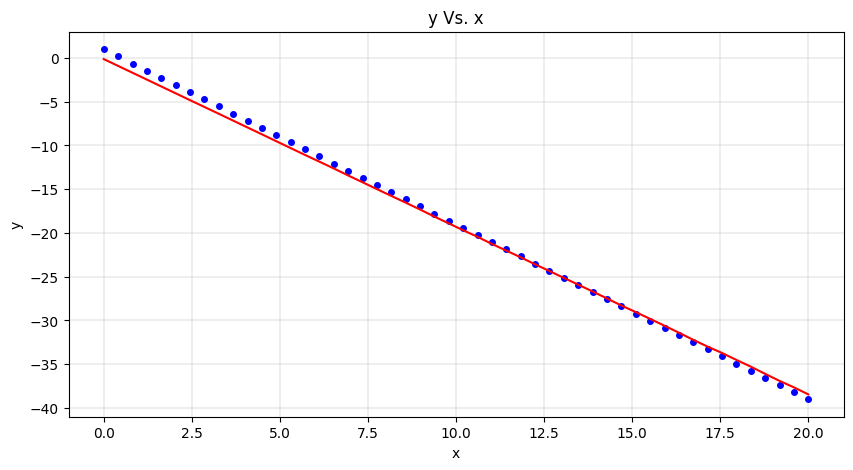

In [234]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.0001)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [235]:
theta_cost_vec, y_pred_GD, thetas_opt= SGD_single_var(X_shuff, y_shuff, 0.00007, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  160.29633430809508

Gradient Vector:
 [[17.905101748278064], [263.09537262775933]]

Gradient Vector Norm:
 263.70393961174665

theta_0_new :  -0.05368238654151982
theta_1_new :  -0.7282513870462166

****************** Ephoc 1 ********************

Cost =  61.99755128844759

Gradient Vector:
 [[11.135308822699763], [163.62086433354753]]

Gradient Vector Norm:
 163.9993364249809

theta_0_new :  -0.0865719732066061
theta_1_new :  -1.1797396203781396

****************** Ephoc 2 ********************

Cost =  24.071587742039004

Gradient Vector:
 [[6.938528337052318], [101.95388576893203]]

Gradient Vector Norm:
 102.18971571967758

theta_0_new :  -0.10657197983359895
theta_1_new :  -1.4596560548160284

****************** Ephoc 3 ********************

Cost =  9.403990010908787

Gradient Vector:
 [[4.336816807500355], [63.724655130617464]]

Gradient Vector Norm:
 63.872056891397726

theta_0_new :  -0.11858179182317563
theta_1_new :  -1

In [236]:
data_shuf = np.array(y_pred_GD[-m:])
y_pred_shuf = data_shuf[:, [1]].reshape(50)

data_shuf_sorted = np.sort(data_shuf, axis = 0)
y_pred_unshuf = data_shuf_sorted[:, [1]].reshape(50)[::-1]

In [237]:
score = r2_score(y_shuff,y_pred_shuf)
print("r2_score: ", score)

r2_score:  0.9976302357701475


<Figure size 1000x500 with 0 Axes>

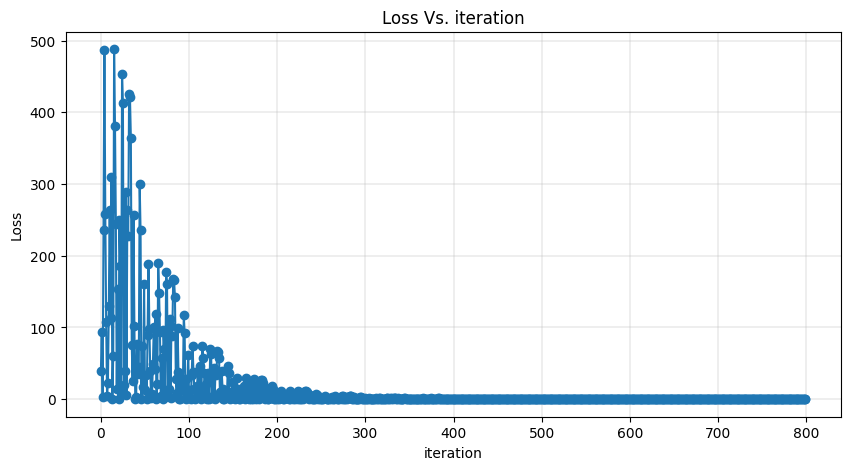

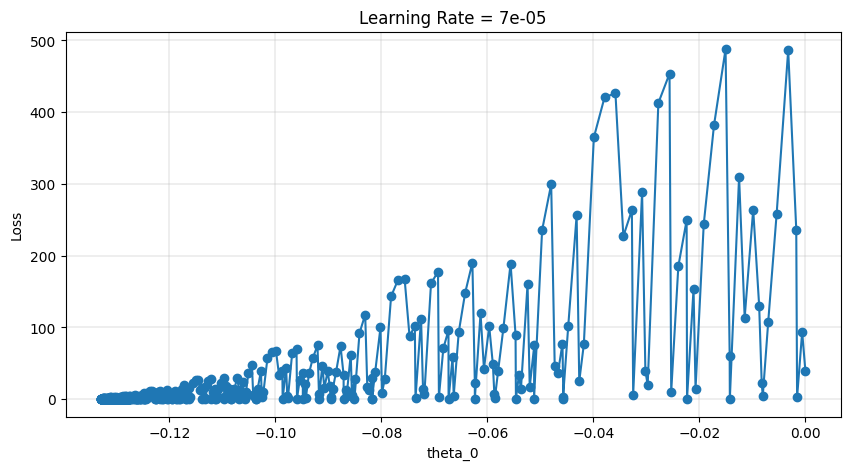

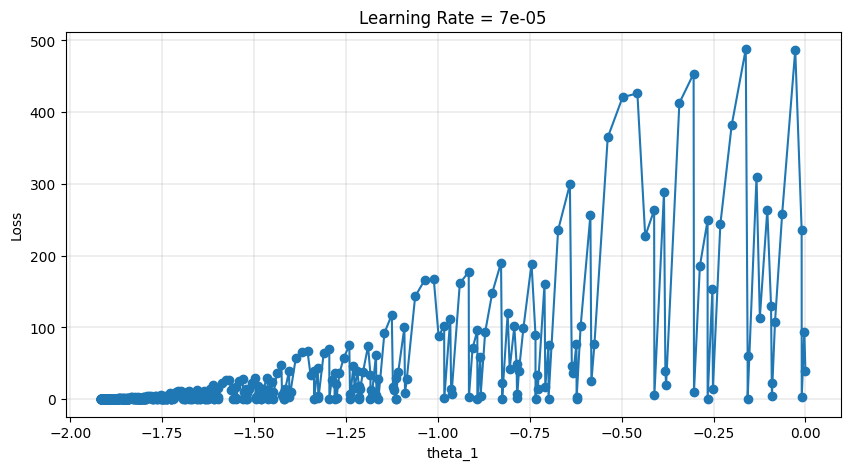

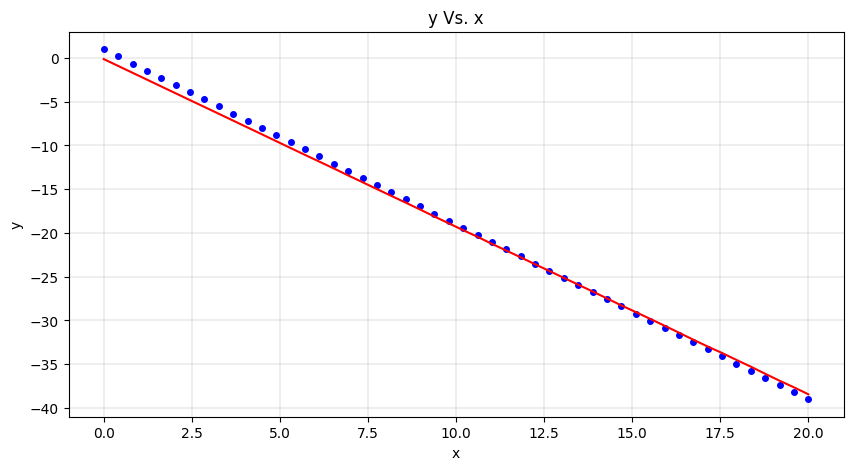

In [238]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.00007)

#### The following results uses alpha = 0.001 and max. iterations = 300.

In [239]:
theta_cost_vec, y_pred_GD, thetas_opt = SGD_single_var(X_shuff, y_shuff, 0.001, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  0.005541104459808194

Gradient Vector:
 [[0.10527207093819513], [1.5468549199081734]]

Gradient Vector Norm:
 1.5504329563588803

theta_0_new :  -0.1527583326155474
theta_1_new :  -1.9159380612495507

****************** Ephoc 1 ********************

Cost =  0.004012904516570796

Gradient Vector:
 [[0.08958687980469904], [1.3163786420282308]]

Gradient Vector Norm:
 1.31942356285661

theta_0_new :  -0.13826614158820025
theta_1_new :  -1.9177602560154428

****************** Ephoc 2 ********************

Cost =  0.003911672142862099

Gradient Vector:
 [[0.08844967091925326], [1.2996686339155583]]

Gradient Vector Norm:
 1.3026749027557327

****************** Training Report ********************

Gradient Descent converged after 3 epochs

theta_0_Opt : -0.12389047763863321
theta__Opt : -1.918799205792997

Cost =  0.003911672142862099


In [240]:
m = len(X)
data_shuf = np.array(y_pred_GD[-m:])
y_pred_shuf = data_shuf[:, [1]].reshape(50)

data_shuf_sorted = np.sort(data_shuf, axis = 0)
y_pred_unshuf = data_shuf_sorted[:, [1]].reshape(50)[::-1]

In [241]:
score = r2_score(y_shuff,y_pred_shuf)
print("r2_score: ", score)

r2_score:  0.9975799078329669


<Figure size 1000x500 with 0 Axes>

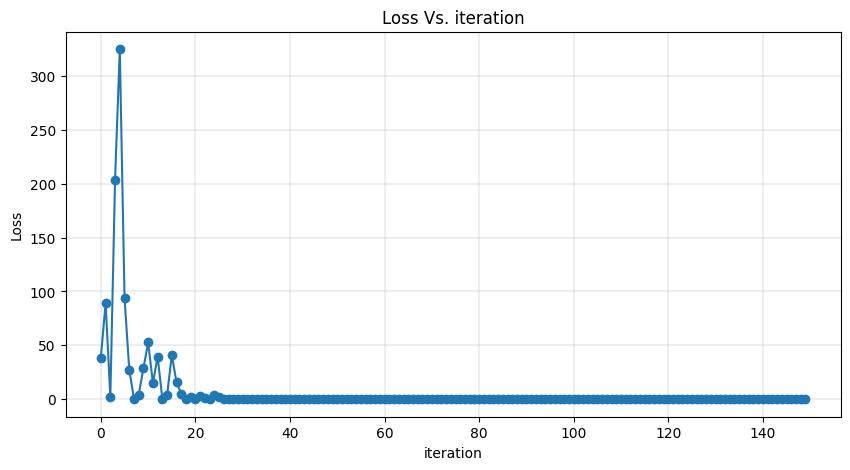

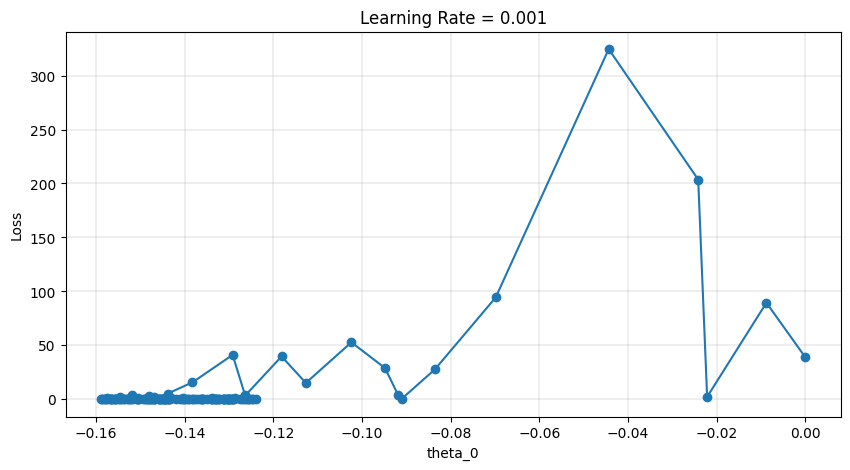

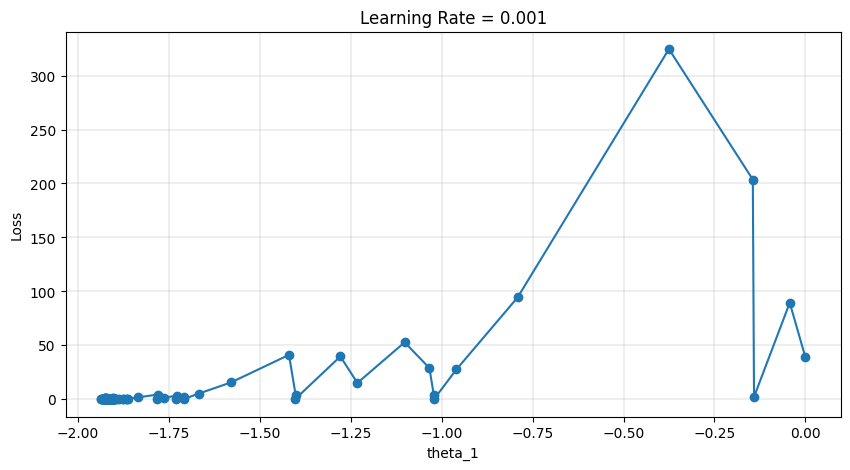

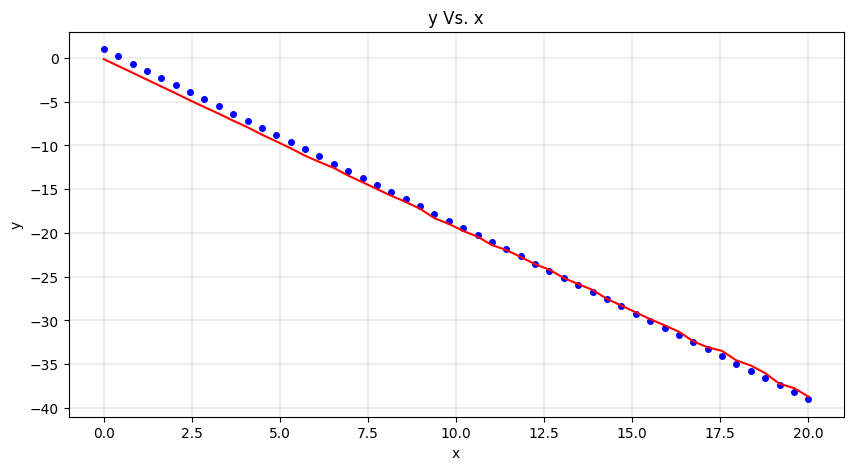

In [242]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.001)

#### The following results uses alpha = 0.01 and max. iterations = 300.

In [243]:
theta_cost_vec, y_pred_GD, thetas_opt= SGD_single_var(X_shuff, y_shuff, 0.005, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  0.1977511625382363

Gradient Vector:
 [[0.6288897559004063], [9.240829066291685]]

Gradient Vector Norm:
 9.26220406585267

theta_0_new :  -0.1424774707806385
theta_1_new :  -1.925866761835381

****************** Ephoc 1 ********************

Cost =  0.17568692697101773

Gradient Vector:
 [[0.592767959611546], [8.71005981470027]]

Gradient Vector Norm:
 8.730207089731522

theta_0_new :  -0.0768565283548735
theta_1_new :  -1.9301247827398211

****************** Ephoc 2 ********************

Cost =  0.1560845251797538

Gradient Vector:
 [[0.5587209056044955], [8.209776572147689]]

Gradient Vector Norm:
 8.228766639961579

theta_0_new :  -0.015004682646528506
theta_1_new :  -1.9341382339684787

****************** Ephoc 3 ********************

Cost =  0.13866927619838085

Gradient Vector:
 [[0.5266294260642503], [7.73822830135225]]

Gradient Vector Norm:
 7.756127628929638

theta_0_new :  0.043294553483107436
theta_1_new :  -1.93792

In [244]:
m = len(X)
data_shuf = np.array(y_pred_GD[-m:])
y_pred_shuf = data_shuf[:, [1]].reshape(50)

data_shuf_sorted = np.sort(data_shuf, axis = 0)
y_pred_unshuf = data_shuf_sorted[:, [1]].reshape(50)[::-1]

In [245]:
score = r2_score(y_shuff,y_pred_shuf)
print("r2_score: ", score)

r2_score:  0.9998812385369612


<Figure size 1000x500 with 0 Axes>

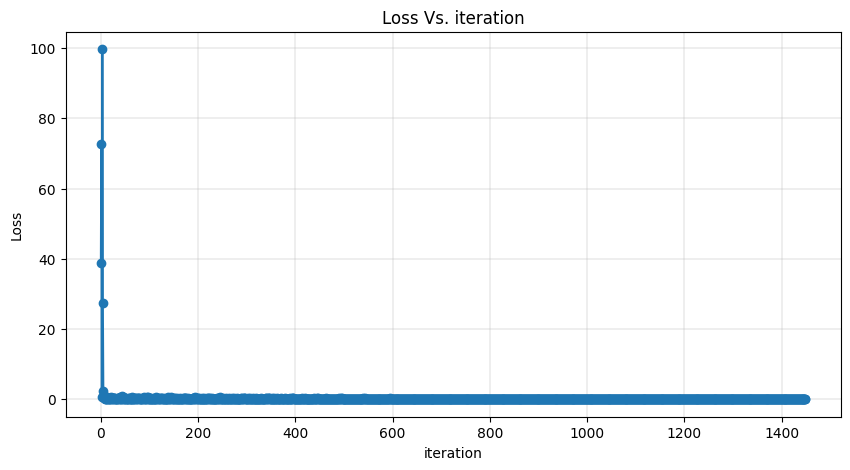

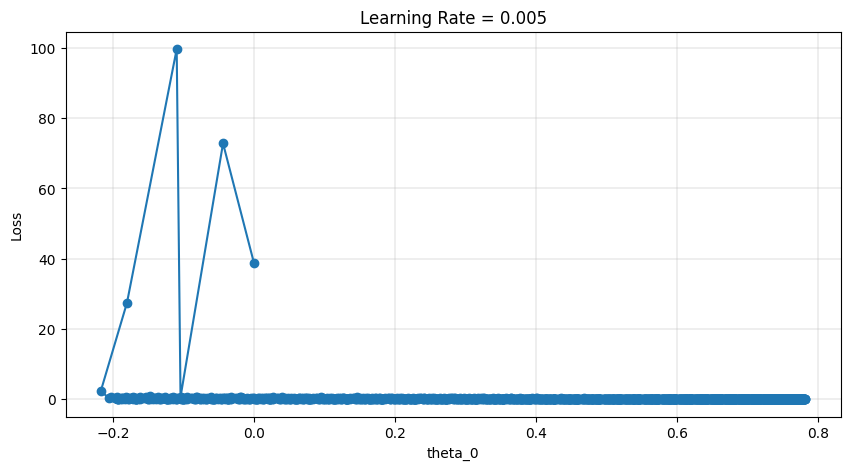

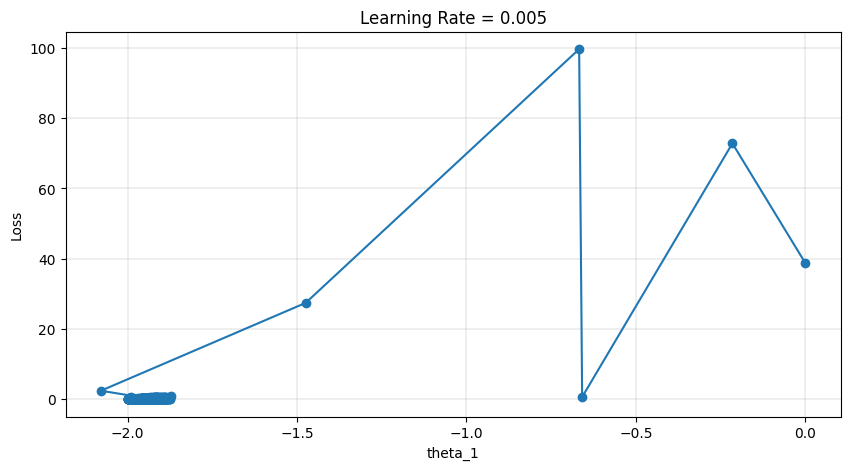

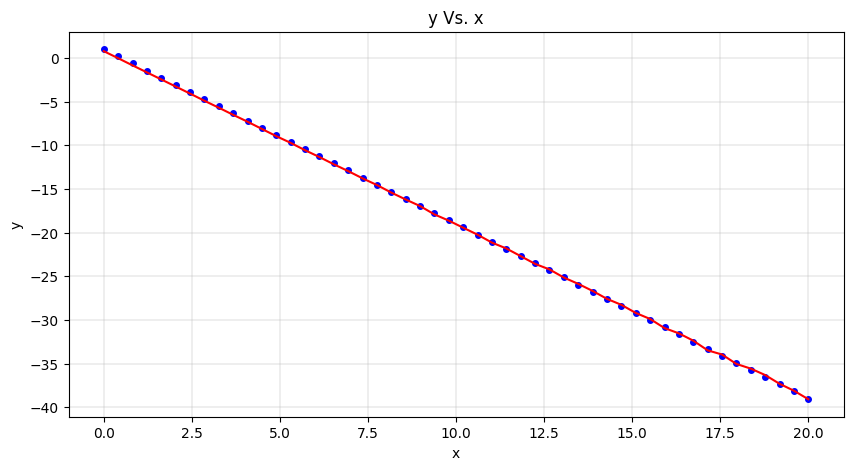

In [246]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.005)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [247]:
import random

X = np.linspace(0,20)

a=-2
b=1
y=a*X+b

# shuffling data:
data = [(i,j) for i,j in zip(X,y)]

np.array(random.shuffle(data))
shuf_data = np.array(data)
    
X_shuff = shuf_data[:, [0]].reshape(50)
y_shuff = shuf_data[:, [1]].reshape(50)

In [248]:
def MBGD_single_var(X, Y, LR, B, Max_iter):    
    # step_1
    theta_0 = 0
    theta_1 = 0
    b = B
    m = len(X)
    Y_pred = []
    Thetas_Cost = []
    epoch_cost = []
    
    X_batchs = [X[b*k:b*(k+1)] for k in range(m//b + 1)]
    Y_batchs = [Y[b*k:b*(k+1)] for k in range(m//b + 1)]

    if len(X_batchs[-1]) == 0:
        del(X_batchs[-1])
        del(Y_batchs[-1])
    
    for i in range(Max_iter):
        print(f"\n****************** Ephoc {i} ********************")
        for j in range(ma.ceil(m/b)):
    # step_2:
            y_pred = theta_0 + (theta_1*X_batchs[j])
            Y_pred.append(y_pred)
    # step_3
            error = y_pred - Y_batchs[j]
            cost = (1/(2*b)) * (error @ error)
        
            Thetas_Cost.append([i, j, theta_0, theta_1, cost])         # append values of thetas 
    # step_4
            d_theta_0 = (1/b) * sum(error * 1)
            d_theta_1 = (1/b) * sum(error * X_batchs[j])
    # step_5
            theta_0 = theta_0 - (LR * d_theta_0)
            theta_1 = theta_1 - (LR * d_theta_1)
            
        print("\nCost = ", cost)
        epoch_cost.append(cost)
        
        GV = [[d_theta_0], 
              [d_theta_1]]
        GV_norm = np.linalg.norm(GV)
        print("\nGradient Vector:\n", GV)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.01) or ((i>0) and (abs(epoch_cost[i] - epoch_cost[i-1]) < 0.01)):   # (Gradient Check, convergence check)
            break
        
        print("\ntheta_0_new : ", theta_0)
        print("theta_1_new : ", theta_1)
    return np.array(Thetas_Cost), Y_pred, [theta_0, theta_1]
    

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [249]:
theta_cost_vec, y_pred_GD, thetas_opt= MBGD_single_var(X_shuff, y_shuff, 0.0005, 5, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  33.20144065996708

Gradient Vector:
 [[7.2184587152423605], [69.36312406395156]]

Gradient Vector Norm:
 69.73771666849149

theta_0_new :  -0.06958972920105978
theta_1_new :  -0.9664249264024911

****************** Ephoc 1 ********************

Cost =  7.590897409451296

Gradient Vector:
 [[3.3302100875203835], [32.98563860291671]]

Gradient Vector Norm:
 33.15332039584047

theta_0_new :  -0.10331187086000712
theta_1_new :  -1.445016540844893

****************** Ephoc 2 ********************

Cost =  1.6507263576027775

Gradient Vector:
 [[1.4052126955370388], [14.974659514113412]]

Gradient Vector Norm:
 15.040447143729663

theta_0_new :  -0.11927471524036079
theta_1_new :  -1.6820519207648148

****************** Ephoc 3 ********************

Cost =  0.36184509371250195

Gradient Vector:
 [[0.45234088296291364], [6.058060858797506]]

Gradient Vector Norm:
 6.07492499075454

theta_0_new :  -0.1264447851835154
theta_1_new :  -1.79

In [250]:
y_p = []
for i in y_pred_GD[-10:]:
    y_p.append(list(i))
y_pr = np.array(y_p).reshape(50)

data_unshuf_sorted = np.sort(y_pr)[::-1]
#data_unshuf_sorted

In [251]:
score = r2_score(y_shuff,y_pr)
print("r2_score: ", score)

r2_score:  0.9975930085589719


<Figure size 1000x500 with 0 Axes>

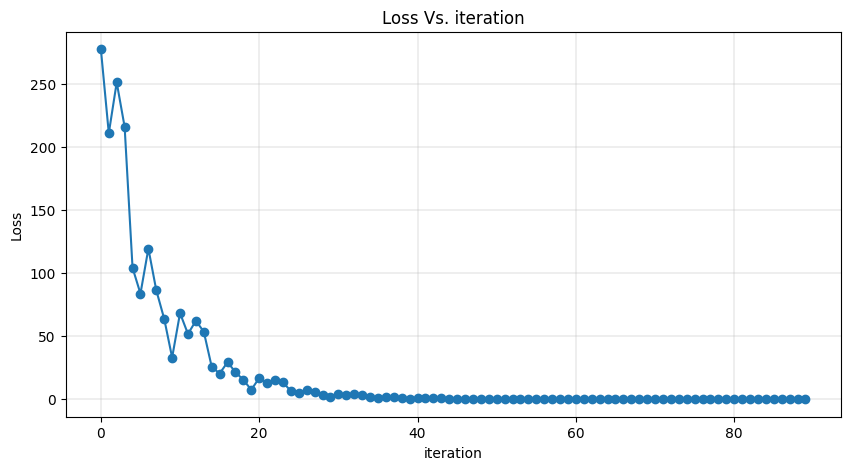

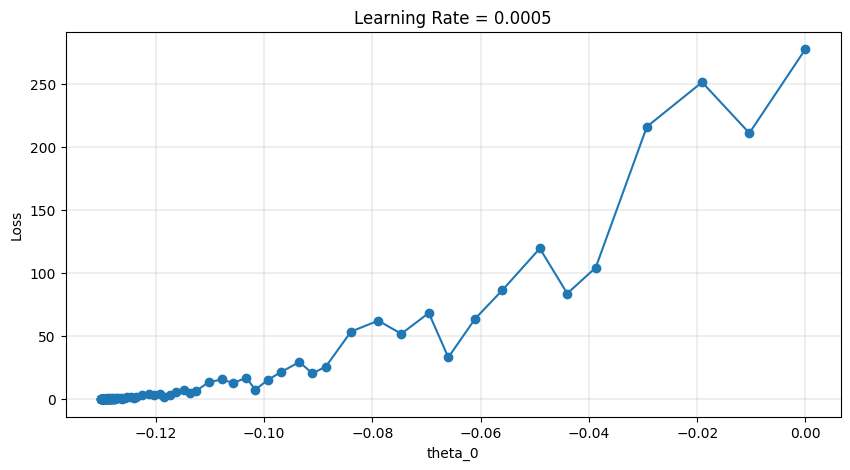

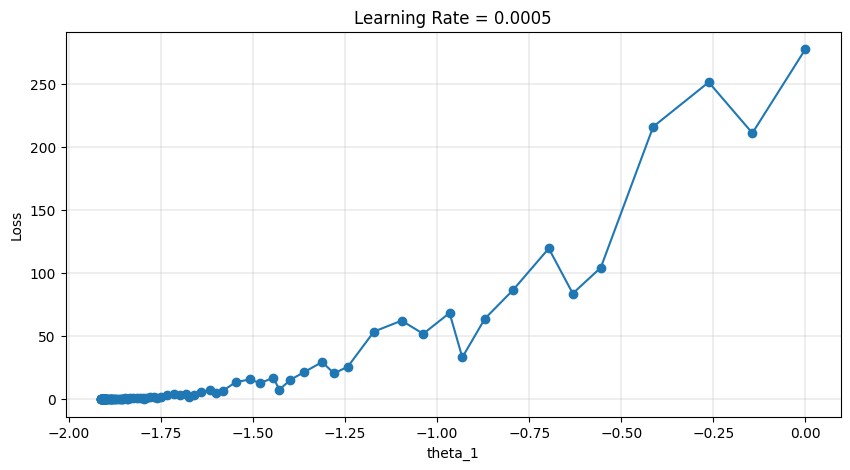

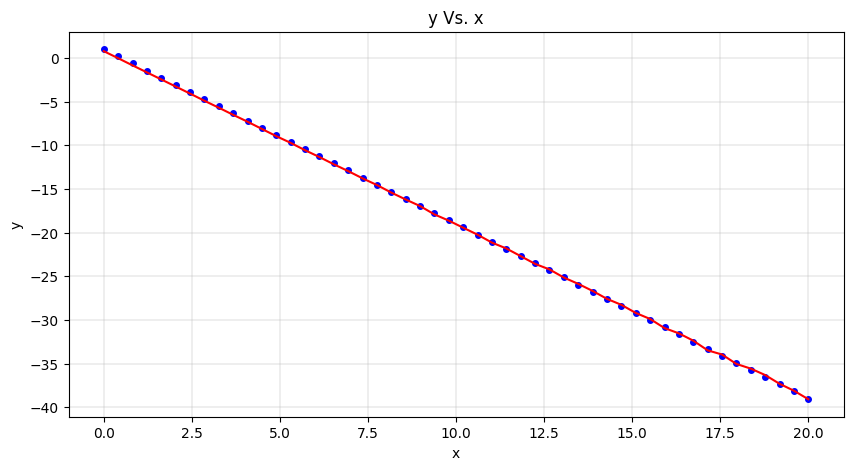

In [252]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.0005)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [253]:
theta_cost_vec, y_pred_GD, thetas_opt= MBGD_single_var(X_shuff, y_shuff, 0.0005, 10, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  93.88804839095627

Gradient Vector:
 [[12.06259929611275], [133.55216775208103]]

Gradient Vector Norm:
 134.09581579250926

theta_0_new :  -0.04120036221849907
theta_1_new :  -0.5672652203819365

****************** Ephoc 1 ********************

Cost =  45.9921562869836

Gradient Vector:
 [[8.369515836535971], [93.4118606650558]]

Gradient Vector Norm:
 93.78605711003009

theta_0_new :  -0.06997893705813306
theta_1_new :  -0.966495204238799

****************** Ephoc 2 ********************

Cost =  22.443593764716734

Gradient Vector:
 [[5.770579004896168], [65.1634236605535]]

Gradient Vector Norm:
 65.41843291623954

theta_0_new :  -0.09001579755002471
theta_1_new :  -1.2474701087128854

****************** Ephoc 3 ********************

Cost =  10.902187372102276

Gradient Vector:
 [[3.9416495802237854], [45.28390919131854]]

Gradient Vector Norm:
 45.45513208715669

theta_0_new :  -0.10390080094302111
theta_1_new :  -1.44522279

In [254]:
y_p = []
for i in y_pred_GD[-5:]:
	y_p.append(list(i))
y_pr = np.array(y_p).reshape(50)

data_unshuf_sorted = np.sort(y_pr)[::-1]
#data_unshuf_sorted

In [255]:
score = r2_score(y_shuff,y_pr)
print("r2_score: ", score)

r2_score:  0.9969817653759538


<Figure size 1000x500 with 0 Axes>

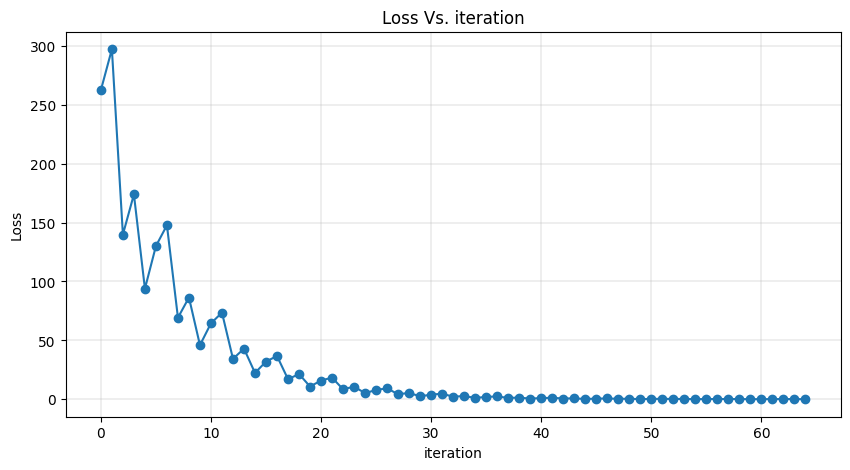

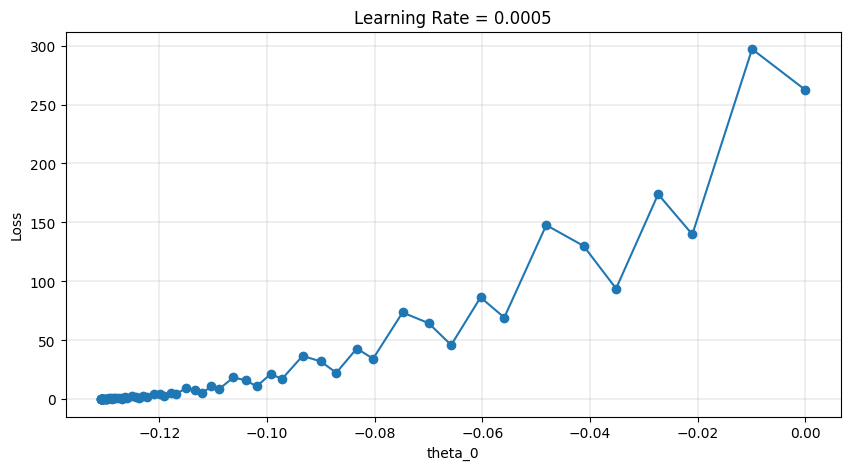

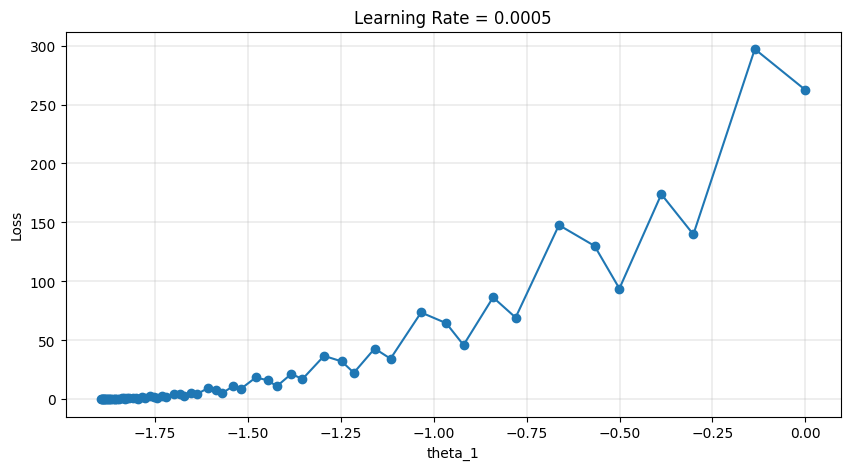

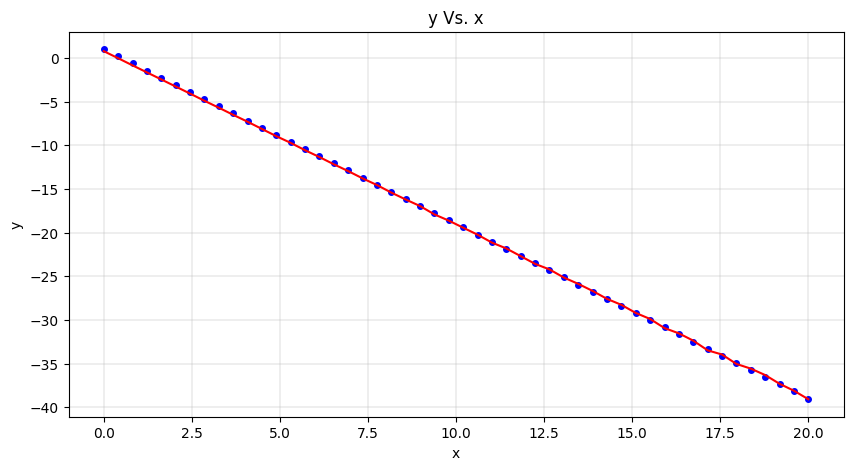

In [256]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.0005)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [257]:
theta_cost_vec, y_pred_GD, thetas_opt= MBGD_single_var(X_shuff, y_shuff, 0.0005, 20, 300)
training_report_S_M_GD(theta_cost_vec, thetas_opt, theta_cost_vec)


****************** Ephoc 0 ********************

Cost =  63.79878671709444

Gradient Vector:
 [[7.050889026949498], [77.85874584533066]]

Gradient Vector Norm:
 78.1773582354773

theta_0_new :  -0.02242987712446167
theta_1_new :  -0.3078232004016625

****************** Ephoc 1 ********************

Cost =  44.74248288646423

Gradient Vector:
 [[5.8852556131757385], [65.1894362085687]]

Gradient Vector Norm:
 65.45455543217342

theta_0_new :  -0.041195665994184796
theta_1_new :  -0.5661707719304184

****************** Ephoc 2 ********************

Cost =  31.354908271361086

Gradient Vector:
 [[4.906998353919965], [54.55666149632757]]

Gradient Vector Norm:
 54.77689244992129

theta_0_new :  -0.05688635693908409
theta_1_new :  -0.7829955066488633

****************** Ephoc 3 ********************

Cost =  21.954520430435867

Gradient Vector:
 [[4.085998096485933], [45.63306573984346]]

Gradient Vector Norm:
 45.81563127646896

theta_0_new :  -0.06999626501458539
theta_1_new :  -0.9649718

In [258]:
y_p = []
for i in y_pred_GD[-3:]:
    for j in i:
        y_p.append(j)
# print(y_p)
y_pr = np.array(y_p).reshape(50)

data_unshuf_sorted = np.sort(y_pr)[::-1]
# data_unshuf_sorted

In [259]:
score = r2_score(y_shuff,y_pr)
print("r2_score: ", score)

r2_score:  0.995506827694628


<Figure size 1000x500 with 0 Axes>

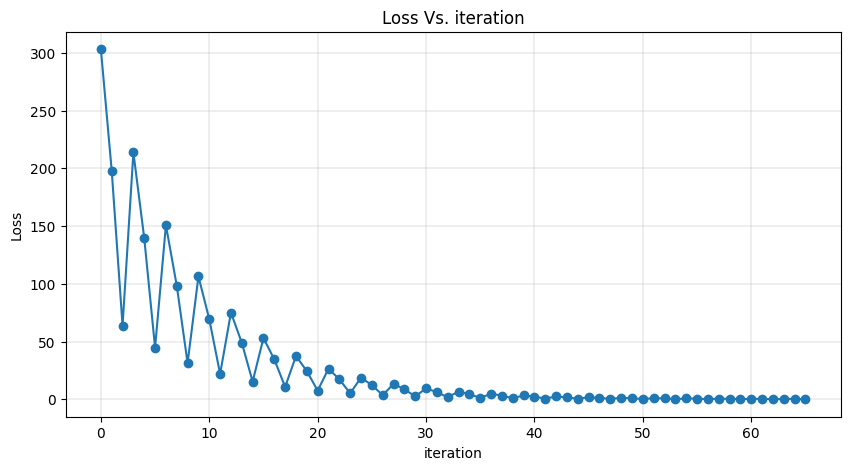

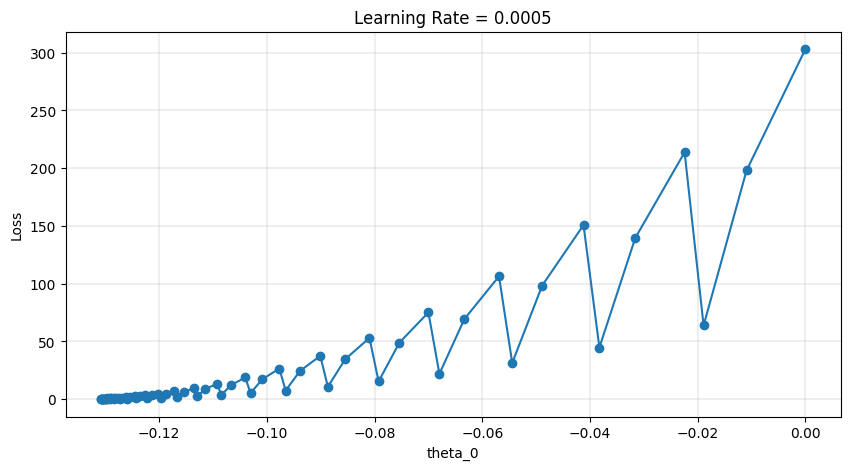

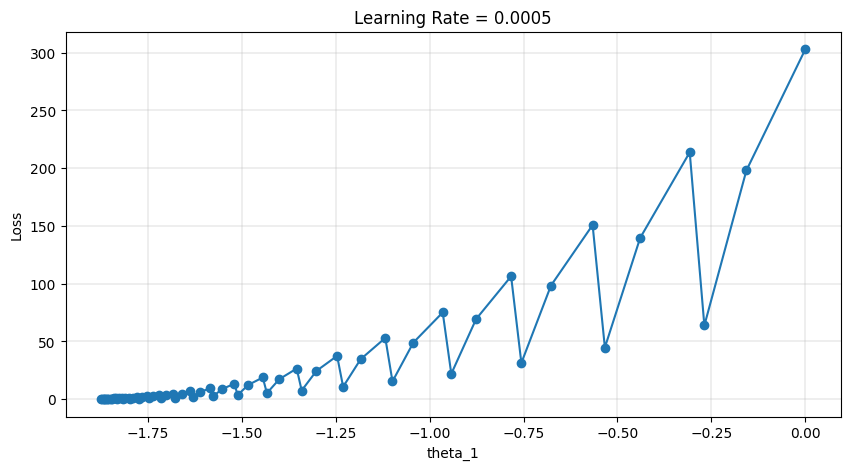

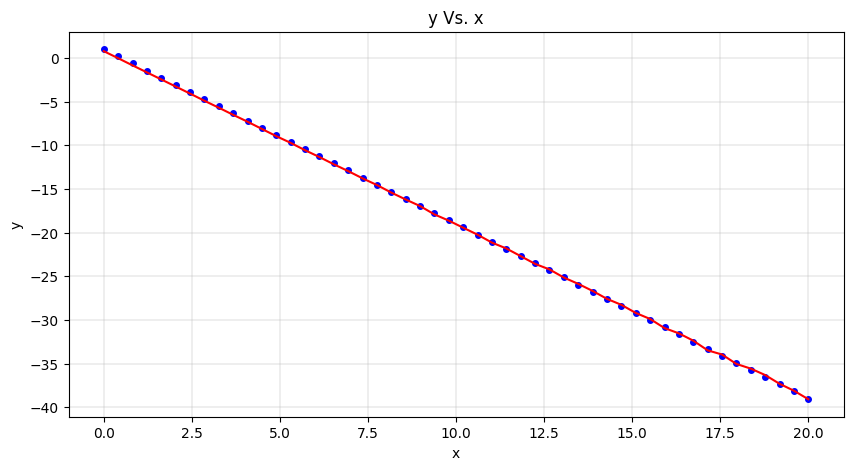

In [260]:
all_plots_S_M_GD(theta_cost_vec, X, y, y_pred_unshuf, 0.0005)